In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv("/content/UNR-IDD.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      37411 non-null  object
 1   Port Number                    37411 non-null  object
 2   Received Packets               37411 non-null  int64 
 3   Received Bytes                 37411 non-null  int64 
 4   Sent Bytes                     37411 non-null  int64 
 5   Sent Packets                   37411 non-null  int64 
 6   Port alive Duration (S)        37411 non-null  int64 
 7   Packets Rx Dropped             37411 non-null  int64 
 8   Packets Tx Dropped             37411 non-null  int64 
 9   Packets Rx Errors              37411 non-null  int64 
 10  Packets Tx Errors              37411 non-null  int64 
 11  Delta Received Packets         37411 non-null  int64 
 12  Delta Received Bytes           37411 non-null  int64 
 13  D

In [3]:
df.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
0,of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
1,of:000000000000000c,Port#:2,187,6304498,15713,171,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
2,of:000000000000000c,Port#:3,235,6311567,8030,58,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
3,of:000000000000000c,Port#:4,59,7878,16439,182,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
4,of:000000000000000a,Port#:1,188,6304547,16497,183,46,0,0,0,...,0,0,True,0,7,489,403,-1,TCP-SYN,Attack


In [4]:
df.tail()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
37406,of:0000000000000006,Port#:2,228,30195,7857046,145141,276,0,0,0,...,0,0,True,0,6,147563,147454,-1,PortScan,Attack
37407,of:0000000000000006,Port#:3,1064,18962056,37732,338,276,0,0,0,...,0,0,True,0,6,147563,147454,-1,PortScan,Attack
37408,of:0000000000000009,Port#:1,1042,25252012,7856976,145140,276,0,0,0,...,0,0,True,0,8,295511,295404,-1,PortScan,Attack
37409,of:0000000000000009,Port#:2,149012,14360115,29509,211,276,0,0,0,...,0,0,True,0,8,295511,295404,-1,PortScan,Attack
37410,of:0000000000000009,Port#:3,228,30377,25258600,1138,276,0,0,0,...,0,0,True,0,8,295511,295404,-1,PortScan,Attack


In [5]:
df.describe()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,Delta Received Packets,...,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size
count,37411.000000,3.741100e+04,3.741100e+04,37411.000000,37411.000000,37411.0,37411.0,37411.0,37411.0,37411.000000,...,3.741100e+04,3.741100e+04,3.741100e+04,3.741100e+04,3.741100e+04,37411.0,37411.000000,3.741100e+04,3.741100e+04,37411.0
mean,21618.897169,2.647491e+07,2.451212e+07,33626.824009,911.096415,0.0,0.0,0.0,0.0,194.958087,...,1.921455e+04,5.145597e+05,1.921455e+04,5.145597e+05,1.921455e+04,0.0,88.690572,1.008636e+05,1.007444e+05,-1.0
std,65283.170126,3.703044e+07,3.439876e+07,88792.970378,982.113446,0.0,0.0,0.0,0.0,1087.140797,...,1.107441e+05,1.863403e+06,1.107441e+05,1.863403e+06,1.107441e+05,0.0,790.715343,2.350297e+05,2.350284e+05,0.0
min,9.000000,7.860000e+02,5.705000e+03,41.000000,26.000000,0.0,0.0,0.0,0.0,0.000000,...,-1.284277e+06,0.000000e+00,-1.284277e+06,0.000000e+00,-1.284277e+06,0.0,4.000000,8.700000e+01,3.700000e+01,-1.0
25%,329.000000,9.104050e+04,5.775950e+04,347.000000,136.000000,0.0,0.0,0.0,0.0,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,5.000000,2.367000e+03,2.272000e+03,-1.0
50%,1170.000000,1.263052e+07,1.262658e+07,1240.000000,259.000000,0.0,0.0,0.0,0.0,4.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,6.000000,7.472000e+03,7.349000e+03,-1.0
75%,3417.000000,3.783230e+07,3.176443e+07,3968.000000,1747.000000,0.0,0.0,0.0,0.0,6.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,8.000000,2.343700e+04,2.322000e+04,-1.0
max,352772.000000,2.715925e+08,2.392430e+08,421598.000000,3317.000000,0.0,0.0,0.0,0.0,15695.000000,...,2.004388e+06,2.606759e+07,2.004388e+06,2.606759e+07,2.004388e+06,0.0,9987.000000,1.012574e+06,1.012439e+06,-1.0


In [6]:
df.apply(pd.Series.value_counts)


TypeError: '<' not supported between instances of 'int' and 'str'

<Axes: xlabel='Binary Label', ylabel='count'>

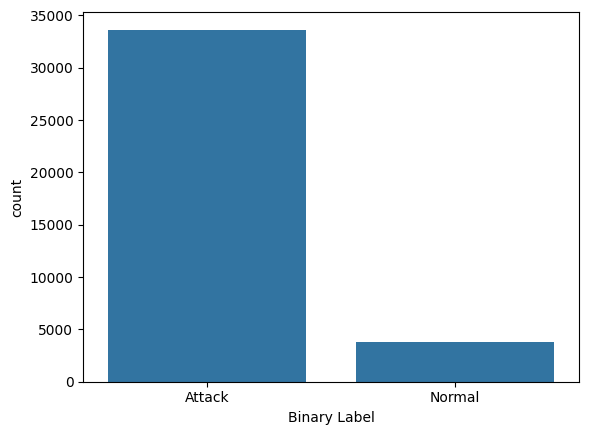

In [7]:
sns.countplot(data=df, x="Binary Label")

In [ ]:
sns.countplot(x=df["Label"])

In [ ]:
sns.countplot(data=df, x="is_valid")

<Axes: xlabel='Binary Label', ylabel='count'>

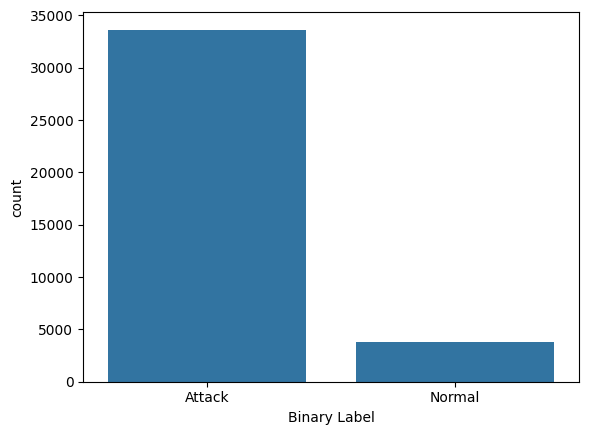

In [8]:
sns.countplot(data=df, x="Binary Label")

<Axes: xlabel='Label', ylabel='count'>

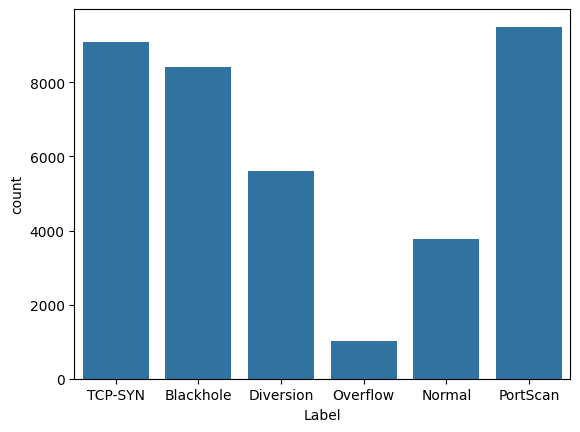

In [9]:
sns.countplot(x=df["Label"])

In [12]:
df["Binary Label"].unique()

array(['Attack', 'Normal'], dtype=object)

In [10]:
df["Label"].unique()

array(['TCP-SYN', 'Blackhole', 'Diversion', 'Overflow', 'Normal',
       'PortScan'], dtype=object)

In [11]:
df["Port Number"].unique()

array(['Port#:1', 'Port#:2', 'Port#:3', 'Port#:4'], dtype=object)

In [13]:
df["Switch ID"].unique()

array(['of:000000000000000c', 'of:000000000000000a',
       'of:000000000000000b', 'of:0000000000000003',
       'of:0000000000000004', 'of:0000000000000001',
       'of:0000000000000002', 'of:0000000000000007',
       'of:0000000000000008', 'of:0000000000000005',
       'of:0000000000000006', 'of:0000000000000009'], dtype=object)

In [14]:
df['Label'].value_counts()

,count
Label,
PortScan,9500
TCP-SYN,9081
Blackhole,8420
Diversion,5615
Normal,3773
Overflow,1022


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      37411 non-null  object
 1   Port Number                    37411 non-null  object
 2   Received Packets               37411 non-null  int64 
 3   Received Bytes                 37411 non-null  int64 
 4   Sent Bytes                     37411 non-null  int64 
 5   Sent Packets                   37411 non-null  int64 
 6   Port alive Duration (S)        37411 non-null  int64 
 7   Packets Rx Dropped             37411 non-null  int64 
 8   Packets Tx Dropped             37411 non-null  int64 
 9   Packets Rx Errors              37411 non-null  int64 
 10  Packets Tx Errors              37411 non-null  int64 
 11  Delta Received Packets         37411 non-null  int64 
 12  Delta Received Bytes           37411 non-null  int64 
 13  D

array([[<Axes: title={'center': 'Received Packets'}>,
        <Axes: title={'center': 'Received Bytes'}>,
        <Axes: title={'center': 'Sent Bytes'}>,
        <Axes: title={'center': 'Sent Packets'}>,
        <Axes: title={'center': 'Port alive Duration (S)'}>],
       [<Axes: title={'center': 'Packets Rx Dropped'}>,
        <Axes: title={'center': 'Packets Tx Dropped'}>,
        <Axes: title={'center': 'Packets Rx Errors'}>,
        <Axes: title={'center': 'Packets Tx Errors'}>,
        <Axes: title={'center': 'Delta Received Packets'}>],
       [<Axes: title={'center': 'Delta Received Bytes'}>,
        <Axes: title={'center': 'Delta Sent Bytes'}>,
        <Axes: title={'center': 'Delta Sent Packets'}>,
        <Axes: title={'center': 'Delta Port alive Duration (S)'}>,
        <Axes: title={'center': 'Delta Packets Rx Dropped'}>],
       [<Axes: title={'center': ' Delta Packets Tx Dropped'}>,
        <Axes: title={'center': 'Delta Packets Rx Errors'}>,
        <Axes: title={'center

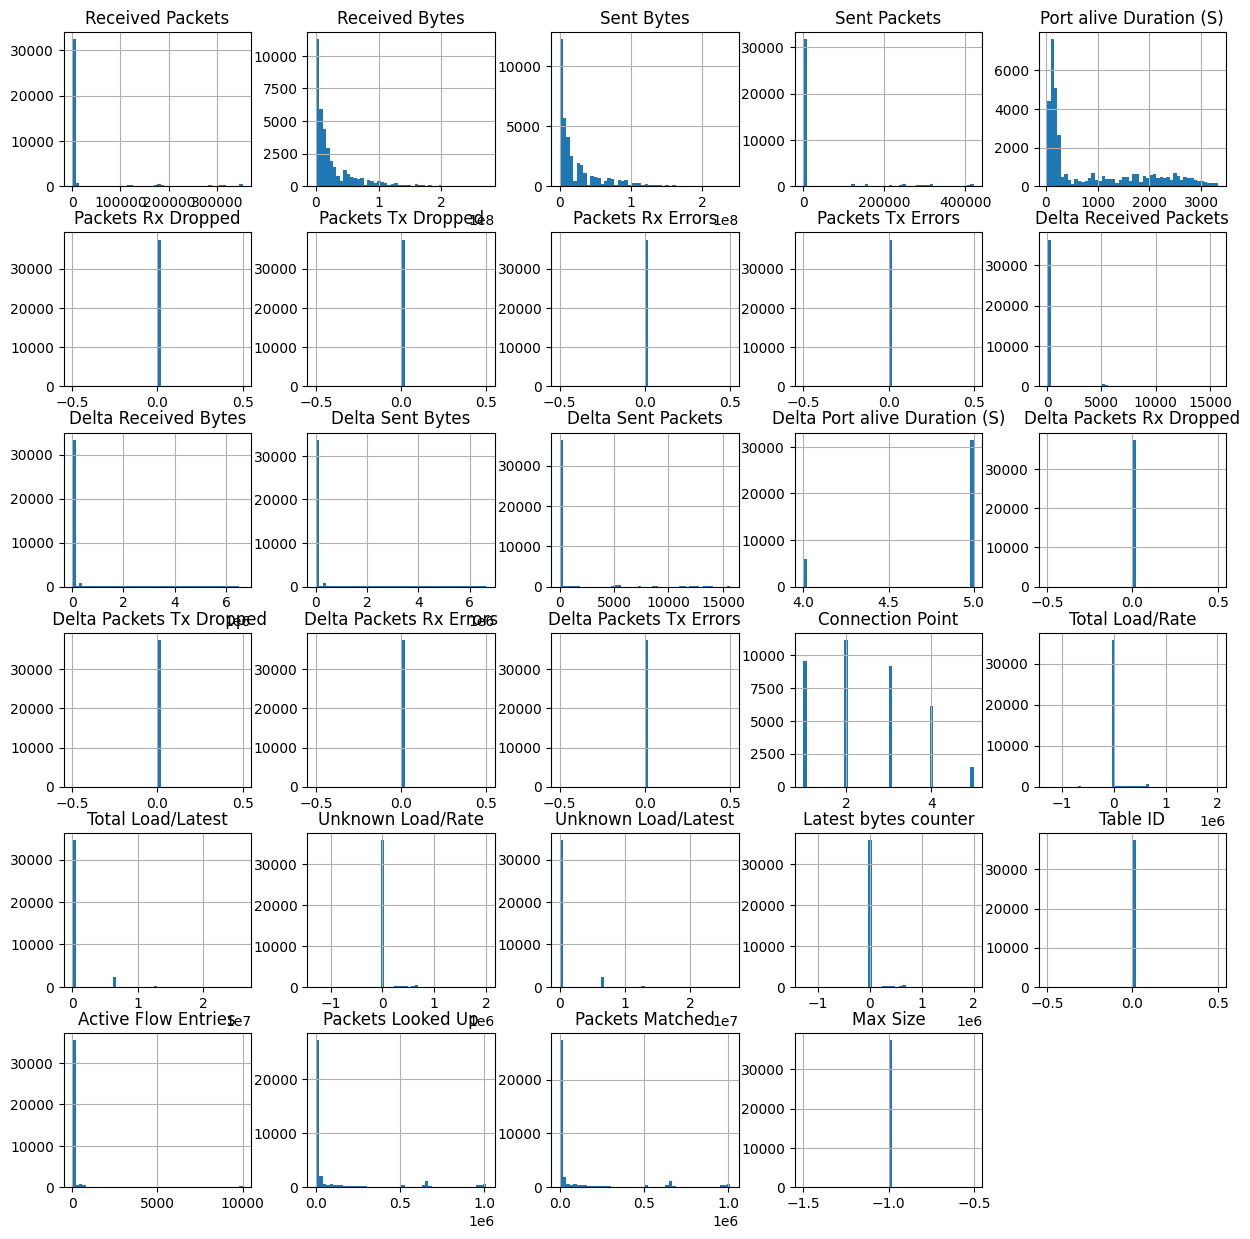

In [15]:
df.hist(bins = 50,figsize = (15,15))

In [16]:
df_o=df[df['Label']=='Overflow']

In [18]:
df_o=df_o.drop(columns=['is_valid', 'Label', 'Binary Label'])


In [19]:
df_o.to_csv("/content/df_o.csv")

In [20]:
df_o.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size
23116,of:000000000000000c,Port#:1,150,10433,6426600,1056,1381,0,0,0,...,367655,6303749,367655,6303749,367655,0,6,2948,2835,-1
23117,of:000000000000000c,Port#:2,17,1382,122687,875,1381,0,0,0,...,436,8935,436,8935,436,0,6,2948,2835,-1
23118,of:000000000000000c,Port#:1,219,15007,9317426,1152,1396,0,0,0,...,262680,8930551,262680,8930551,262680,0,7,3125,3012,-1
23119,of:000000000000000c,Port#:2,17,1382,124171,887,1396,0,0,0,...,-893,0,-893,0,-893,0,7,3125,3012,-1
23120,of:000000000000000c,Port#:1,12,996,13734,97,157,0,0,0,...,65734,6303286,65734,6303286,65734,0,6,593,500,-1


In [21]:
df_d=df[df['Label']=='Diversion']

In [22]:
df_d=df_d.drop(columns=['is_valid', 'Label', 'Binary Label'])

In [23]:
df_d.to_csv("/content/df_d.csv")

In [24]:
df_d.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size
17501,of:000000000000000c,Port#:1,49,3622,17103,170,104,0,0,0,...,0,0,0,0,0,0,4,582,442,-1
17502,of:000000000000000c,Port#:2,49,3622,17131,170,104,0,0,0,...,0,0,0,0,0,0,4,582,442,-1
17503,of:000000000000000c,Port#:3,193,18967,16405,149,104,0,0,0,...,0,0,0,0,0,0,4,582,442,-1
17504,of:000000000000000c,Port#:4,143,14851,15761,155,104,0,0,0,...,0,0,0,0,0,0,4,582,442,-1
17505,of:000000000000000a,Port#:1,49,3622,17111,170,104,0,0,0,...,616982,6302552,616982,6302552,616982,0,6,886,748,-1


In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

# Load real data from CSV (replace 'your_real_data.csv' with your actual file)
real_data = pd.read_csv('/content/df_o.csv')

# Generate some random noise as input for the generator
def generate_noise(batch_size, noise_dim):
    return np.random.normal(0, 1, size=(batch_size, noise_dim))

# Generator model
def build_generator(noise_dim, data_dim):
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, input_dim=noise_dim, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(data_dim, activation='sigmoid'))  # Assuming binary classification (0 or 1)
    return model

# Discriminator model
def build_discriminator(data_dim):
    model = tf.keras.Sequential()
    model.add(layers.Dense(512, input_dim=data_dim, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output 1 for real data, 0 for synthetic data
    return model

# Combined GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = tf.keras.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Compile the discriminator
def compile_discriminator(discriminator, learning_rate=0.0002):
    discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Compile the GAN
def compile_gan(gan, learning_rate=0.0002):
    gan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy')

# Build and compile the models
noise_dim = 100  # Size of the random noise vector
data_dim = real_data.shape[1]  # Assuming real_data is a DataFrame

generator = build_generator(noise_dim, data_dim)
discriminator = build_discriminator(data_dim)

compile_discriminator(discriminator)
gan = build_gan(generator, discriminator)
compile_gan(gan)

# Training the GAN (same as in the previous example)

# Generate synthetic data
num_samples = 8478  # Choose the number of synthetic samples you want
synthetic_data = generator.predict(generate_noise(num_samples, noise_dim))

# Save synthetic data to a new CSV file
synthetic_df_o = pd.DataFrame(synthetic_data, columns=real_data.columns)
synthetic_df_o.to_csv('synthetic_data_overflow.csv', index=False)

print("Synthetic Data:")
print(synthetic_df_o.head())  # Print the first 5 examples of synthetic data


265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Synthetic Data:
   Unnamed: 0  Switch ID  Port Number  Received Packets  Received Bytes  \
0    0.425872   0.488915     0.471154          0.533407        0.426676   
1    0.454196   0.597253     0.551345          0.549757        0.531496   
2    0.519378   0.466620     0.622799          0.601610        0.615516   
3    0.464129   0.642559     0.507667          0.619839        0.411717   
4    0.391220   0.485489     0.447800          0.506341        0.459543   

   Sent Bytes  Sent Packets  Port alive Duration (S)  Packets Rx Dropped  \
0    0.441572      0.434219                 0.570356            0.627935   
1    0.352962      0.604777                 0.582446            0.556440   
2    0.271075      0.483508                 0.506588            0.643835   
3    0.440800      0.549352                 0.548254            0.604196   
4    0.335874      0.671564                 0.655795            0.583717   

   Packets Tx Dropped  ...  Total L

In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

# Load real data from CSV (replace 'your_real_data.csv' with your actual file)
real_data = pd.read_csv('/content/df_d.csv')

# Generate some random noise as input for the generator
def generate_noise(batch_size, noise_dim):
    return np.random.normal(0, 1, size=(batch_size, noise_dim))

# Generator model
def build_generator(noise_dim, data_dim):
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, input_dim=noise_dim, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(data_dim, activation='sigmoid'))  # Assuming binary classification (0 or 1)
    return model

# Discriminator model
def build_discriminator(data_dim):
    model = tf.keras.Sequential()
    model.add(layers.Dense(512, input_dim=data_dim, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output 1 for real data, 0 for synthetic data
    return model

# Combined GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = tf.keras.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Compile the discriminator
def compile_discriminator(discriminator, learning_rate=0.0002):
    discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Compile the GAN
def compile_gan(gan, learning_rate=0.0002):
    gan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy')

# Build and compile the models
noise_dim = 100  # Size of the random noise vector
data_dim = real_data.shape[1]  # Assuming real_data is a DataFrame

generator = build_generator(noise_dim, data_dim)
discriminator = build_discriminator(data_dim)

compile_discriminator(discriminator)
gan = build_gan(generator, discriminator)
compile_gan(gan)

# Training the GAN (same as in the previous example)

# Generate synthetic data
num_samples = 3885  # Choose the number of synthetic samples you want
synthetic_data = generator.predict(generate_noise(num_samples, noise_dim))

# Save synthetic data to a new CSV file
synthetic_df_d = pd.DataFrame(synthetic_data, columns=real_data.columns)
synthetic_df_d.to_csv('synthetic_data_diversion.csv', index=False)

print("Synthetic Data:")
print(synthetic_df_d.head())  # Print the first 5 examples of synthetic data


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Synthetic Data:
   Unnamed: 0  Switch ID  Port Number  Received Packets  Received Bytes  \
0    0.533187   0.323783     0.483600          0.503827        0.437906   
1    0.506446   0.270449     0.537228          0.337528        0.389959   
2    0.517060   0.304144     0.558888          0.429474        0.460892   
3    0.409590   0.441693     0.492859          0.442621        0.513862   
4    0.497337   0.334304     0.685487          0.522107        0.396058   

   Sent Bytes  Sent Packets  Port alive Duration (S)  Packets Rx Dropped  \
0    0.465120      0.582858                 0.575162            0.532338   
1    0.403328      0.396569                 0.513665            0.458958   
2    0.409935      0.538508                 0.470208            0.445458   
3    0.255688      0.458377                 0.560898            0.498656   
4    0.435899      0.494957                 0.451010            0.471255   

   Packets Tx Dropped  ...  Total L

In [27]:
synthetic_df_o.head()

,Unnamed: 0,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,...,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size
0,0.425872,0.488915,0.471154,0.533407,0.426676,0.441572,0.434219,0.570356,0.627935,0.411542,...,0.378871,0.512408,0.464890,0.515177,0.570560,0.284795,0.427929,0.595165,0.382262,0.639127
1,0.454196,0.597253,0.551345,0.549757,0.531496,0.352962,0.604777,0.582446,0.556440,0.372109,...,0.460728,0.604524,0.506700,0.454016,0.526188,0.463284,0.457743,0.549399,0.369933,0.611017
2,0.519378,0.466620,0.622799,0.601610,0.615516,0.271075,0.483508,0.506588,0.643835,0.283910,...,0.316564,0.541779,0.461240,0.485857,0.506772,0.347261,0.527323,0.572310,0.646759,0.614047
3,0.464129,0.642559,0.507667,0.619839,0.411717,0.440800,0.549352,0.548254,0.604196,0.427949,...,0.598394,0.494730,0.462797,0.438768,0.557662,0.314124,0.564768,0.581177,0.369253,0.521113
4,0.391220,0.485489,0.447800,0.506341,0.459543,0.335874,0.671564,0.655795,0.583717,0.540714,...,0.428791,0.534604,0.520999,0.481428,0.694078,0.397061,0.488737,0.464923,0.348044,0.469721


In [28]:
synthetic_df_o['is_valid'] = 'True'
synthetic_df_o['Label'] = 'Overflow'
synthetic_df_o['Binary Label'] = 'Attack'


In [29]:
synthetic_df_o['Label'].value_counts()

,count
Label,
Overflow,8478


In [30]:
synthetic_df_o.head()

,Unnamed: 0,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,...,Unknown Load/Latest,Latest bytes counter,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,is_valid,Label,Binary Label
0,0.425872,0.488915,0.471154,0.533407,0.426676,0.441572,0.434219,0.570356,0.627935,0.411542,...,0.515177,0.570560,0.284795,0.427929,0.595165,0.382262,0.639127,True,Overflow,Attack
1,0.454196,0.597253,0.551345,0.549757,0.531496,0.352962,0.604777,0.582446,0.556440,0.372109,...,0.454016,0.526188,0.463284,0.457743,0.549399,0.369933,0.611017,True,Overflow,Attack
2,0.519378,0.466620,0.622799,0.601610,0.615516,0.271075,0.483508,0.506588,0.643835,0.283910,...,0.485857,0.506772,0.347261,0.527323,0.572310,0.646759,0.614047,True,Overflow,Attack
3,0.464129,0.642559,0.507667,0.619839,0.411717,0.440800,0.549352,0.548254,0.604196,0.427949,...,0.438768,0.557662,0.314124,0.564768,0.581177,0.369253,0.521113,True,Overflow,Attack
4,0.391220,0.485489,0.447800,0.506341,0.459543,0.335874,0.671564,0.655795,0.583717,0.540714,...,0.481428,0.694078,0.397061,0.488737,0.464923,0.348044,0.469721,True,Overflow,Attack


In [31]:
synthetic_df_d['is_valid'] = 'True'
synthetic_df_d['Label'] = 'Diversion'
synthetic_df_d['Binary Label'] = 'Attack'


In [32]:
synthetic_df_d.head()

,Unnamed: 0,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,...,Unknown Load/Latest,Latest bytes counter,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,is_valid,Label,Binary Label
0,0.533187,0.323783,0.483600,0.503827,0.437906,0.465120,0.582858,0.575162,0.532338,0.580622,...,0.465520,0.390425,0.452590,0.519078,0.606174,0.542834,0.491837,True,Diversion,Attack
1,0.506446,0.270449,0.537228,0.337528,0.389959,0.403328,0.396569,0.513665,0.458958,0.415566,...,0.486549,0.487485,0.490490,0.702767,0.662012,0.638830,0.474379,True,Diversion,Attack
2,0.517060,0.304144,0.558888,0.429474,0.460892,0.409935,0.538508,0.470208,0.445458,0.462305,...,0.348390,0.371924,0.407082,0.543635,0.683162,0.464845,0.469143,True,Diversion,Attack
3,0.409590,0.441693,0.492859,0.442621,0.513862,0.255688,0.458377,0.560898,0.498656,0.420539,...,0.546214,0.459429,0.496347,0.642871,0.598330,0.524732,0.511743,True,Diversion,Attack
4,0.497337,0.334304,0.685487,0.522107,0.396058,0.435899,0.494957,0.451010,0.471255,0.450589,...,0.488087,0.359846,0.392230,0.588397,0.673308,0.577165,0.516828,True,Diversion,Attack


In [34]:
# Concatenate the two DataFrames vertically
concatenated_df = pd.concat([df, synthetic_df_o, synthetic_df_d], ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
concatenated_df.to_csv('concatenated_data.csv', index=False)

In [35]:
concatenated_df.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label,Unnamed: 0
0,of:000000000000000c,Port#:1,132.0,9181.0,6311853.0,238.0,46.0,0.0,0.0,0.0,...,0.0,True,0.0,9.0,767.0,688.0,-1.0,TCP-SYN,Attack,NaN
1,of:000000000000000c,Port#:2,187.0,6304498.0,15713.0,171.0,46.0,0.0,0.0,0.0,...,0.0,True,0.0,9.0,767.0,688.0,-1.0,TCP-SYN,Attack,NaN
2,of:000000000000000c,Port#:3,235.0,6311567.0,8030.0,58.0,46.0,0.0,0.0,0.0,...,0.0,True,0.0,9.0,767.0,688.0,-1.0,TCP-SYN,Attack,NaN
3,of:000000000000000c,Port#:4,59.0,7878.0,16439.0,182.0,46.0,0.0,0.0,0.0,...,0.0,True,0.0,9.0,767.0,688.0,-1.0,TCP-SYN,Attack,NaN
4,of:000000000000000a,Port#:1,188.0,6304547.0,16497.0,183.0,46.0,0.0,0.0,0.0,...,0.0,True,0.0,7.0,489.0,403.0,-1.0,TCP-SYN,Attack,NaN


In [36]:
concatenated_df['Label'].value_counts()

,count
Label,
Overflow,9500
Diversion,9500
PortScan,9500
TCP-SYN,9081
Blackhole,8420
Normal,3773


In [37]:
synthetic_df_d['Label'].value_counts()

,count
Label,
Diversion,3885


In [38]:
df['Label'].value_counts()

,count
Label,
PortScan,9500
TCP-SYN,9081
Blackhole,8420
Diversion,5615
Normal,3773
Overflow,1022


<Axes: xlabel='Label', ylabel='count'>

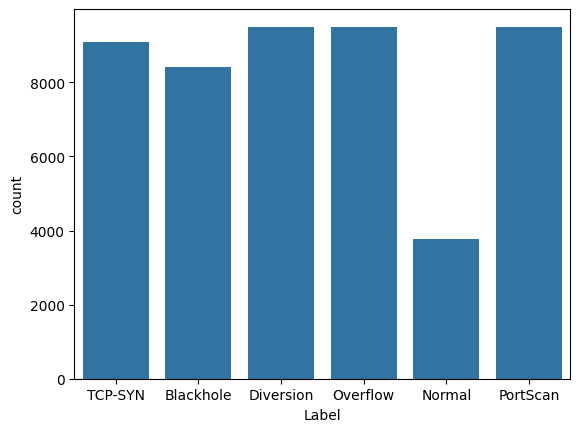

In [39]:
sns.countplot(x=concatenated_df["Label"])

Data Pre-Processing

In [40]:
#['Attack', 'Normal']=[1,0]
df_a=df[df['Binary Label']=='Attack']
df_n=df[df['Binary Label']=='Normal']


In [41]:
#['Attack', 'Normal']=[1,0]
concatenated_df_a=concatenated_df[concatenated_df['Binary Label']=='Attack']
concatenated_df_n=concatenated_df[concatenated_df['Binary Label']=='Normal']

In [43]:
df_a

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
0,of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
1,of:000000000000000c,Port#:2,187,6304498,15713,171,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
2,of:000000000000000c,Port#:3,235,6311567,8030,58,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
3,of:000000000000000c,Port#:4,59,7878,16439,182,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
4,of:000000000000000a,Port#:1,188,6304547,16497,183,46,0,0,0,...,0,0,True,0,7,489,403,-1,TCP-SYN,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37406,of:0000000000000006,Port#:2,228,30195,7857046,145141,276,0,0,0,...,0,0,True,0,6,147563,147454,-1,PortScan,Attack
37407,of:0000000000000006,Port#:3,1064,18962056,37732,338,276,0,0,0,...,0,0,True,0,6,147563,147454,-1,PortScan,Attack
37408,of:0000000000000009,Port#:1,1042,25252012,7856976,145140,276,0,0,0,...,0,0,True,0,8,295511,295404,-1,PortScan,Attack
37409,of:0000000000000009,Port#:2,149012,14360115,29509,211,276,0,0,0,...,0,0,True,0,8,295511,295404,-1,PortScan,Attack


In [42]:
concatenated_df_a

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label,Unnamed: 0
0,of:000000000000000c,Port#:1,132.000000,9.181000e+03,6.311853e+06,238.000000,46.000000,0.000000,0.000000,0.000000,...,0.000000,True,0.000000,9.000000,767.000000,688.000000,-1.000000,TCP-SYN,Attack,NaN
1,of:000000000000000c,Port#:2,187.000000,6.304498e+06,1.571300e+04,171.000000,46.000000,0.000000,0.000000,0.000000,...,0.000000,True,0.000000,9.000000,767.000000,688.000000,-1.000000,TCP-SYN,Attack,NaN
2,of:000000000000000c,Port#:3,235.000000,6.311567e+06,8.030000e+03,58.000000,46.000000,0.000000,0.000000,0.000000,...,0.000000,True,0.000000,9.000000,767.000000,688.000000,-1.000000,TCP-SYN,Attack,NaN
3,of:000000000000000c,Port#:4,59.000000,7.878000e+03,1.643900e+04,182.000000,46.000000,0.000000,0.000000,0.000000,...,0.000000,True,0.000000,9.000000,767.000000,688.000000,-1.000000,TCP-SYN,Attack,NaN
4,of:000000000000000a,Port#:1,188.000000,6.304547e+06,1.649700e+04,183.000000,46.000000,0.000000,0.000000,0.000000,...,0.000000,True,0.000000,7.000000,489.000000,403.000000,-1.000000,TCP-SYN,Attack,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49769,0.460735,0.414521,0.474370,4.239630e-01,4.570600e-01,0.662680,0.611384,0.574136,0.507610,0.432015,...,0.334371,True,0.455041,0.452249,0.554244,0.402795,0.589428,Diversion,Attack,0.478168
49770,0.364113,0.546156,0.520079,5.003424e-01,3.139864e-01,0.576324,0.513843,0.463718,0.459141,0.470151,...,0.469763,True,0.381211,0.564928,0.632166,0.462168,0.476329,Diversion,Attack,0.550673
49771,0.323674,0.617596,0.435157,3.762511e-01,3.320006e-01,0.407037,0.556366,0.359116,0.332495,0.655090,...,0.384786,True,0.457479,0.596843,0.554404,0.472286,0.490187,Diversion,Attack,0.480250
49772,0.301861,0.493669,0.395162,3.795565e-01,4.299750e-01,0.525732,0.569794,0.561882,0.378073,0.450710,...,0.356717,True,0.553029,0.669079,0.551453,0.451888,0.618684,Diversion,Attack,0.541034


In [44]:
print(df_n['Label'].nunique())
# no need to use df_n as it has nomal
df_n.info()

1
<class 'pandas.core.frame.DataFrame'>
Index: 3773 entries, 24138 to 27910
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      3773 non-null   object
 1   Port Number                    3773 non-null   object
 2   Received Packets               3773 non-null   int64 
 3   Received Bytes                 3773 non-null   int64 
 4   Sent Bytes                     3773 non-null   int64 
 5   Sent Packets                   3773 non-null   int64 
 6   Port alive Duration (S)        3773 non-null   int64 
 7   Packets Rx Dropped             3773 non-null   int64 
 8   Packets Tx Dropped             3773 non-null   int64 
 9   Packets Rx Errors              3773 non-null   int64 
 10  Packets Tx Errors              3773 non-null   int64 
 11  Delta Received Packets         3773 non-null   int64 
 12  Delta Received Bytes           3773 non-null   int64 
 13  D

In [45]:
print(concatenated_df_n['Label'].nunique())
# no need to use df_n as it has nomal
concatenated_df_n.info()

1
<class 'pandas.core.frame.DataFrame'>
Index: 3773 entries, 24138 to 27910
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Switch ID                      3773 non-null   object 
 1   Port Number                    3773 non-null   object 
 2   Received Packets               3773 non-null   float64
 3   Received Bytes                 3773 non-null   float64
 4   Sent Bytes                     3773 non-null   float64
 5   Sent Packets                   3773 non-null   float64
 6   Port alive Duration (S)        3773 non-null   float64
 7   Packets Rx Dropped             3773 non-null   float64
 8   Packets Tx Dropped             3773 non-null   float64
 9   Packets Rx Errors              3773 non-null   float64
 10  Packets Tx Errors              3773 non-null   float64
 11  Delta Received Packets         3773 non-null   float64
 12  Delta Received Bytes           3773 non-null  

In [46]:
df_a=df_a.drop('Binary Label', axis=1)

In [47]:
concatenated_df_a=concatenated_df_a.drop('Binary Label', axis=1)

In [48]:
df_a["Port Number"]=df_a["Port Number"].replace(['Port#:1', 'Port#:2', 'Port#:3', 'Port#:4'],[1,2,3,4])
df_a["Switch ID"]=df_a["Switch ID"].replace(['of:000000000000000c', 'of:000000000000000a',
       'of:000000000000000b', 'of:0000000000000003',
       'of:0000000000000004', 'of:0000000000000001',
       'of:0000000000000002', 'of:0000000000000007',
       'of:0000000000000008', 'of:0000000000000005',
       'of:0000000000000006', 'of:0000000000000009'],[12,10,11,3,4,1,2,7,8,5,6,9])

df_a['Label']=df_a['Label'].replace(['TCP-SYN', 'Blackhole', 'Diversion', 'Overflow','PortScan'],
                   [0,1,2,3,4])

In [49]:
concatenated_df_a["Port Number"]=concatenated_df_a["Port Number"].replace(['Port#:1', 'Port#:2', 'Port#:3', 'Port#:4'],[1,2,3,4])
concatenated_df_a["Switch ID"]=concatenated_df_a["Switch ID"].replace(['of:000000000000000c', 'of:000000000000000a',
       'of:000000000000000b', 'of:0000000000000003',
       'of:0000000000000004', 'of:0000000000000001',
       'of:0000000000000002', 'of:0000000000000007',
       'of:0000000000000008', 'of:0000000000000005',
       'of:0000000000000006', 'of:0000000000000009'],[12,10,11,3,4,1,2,7,8,5,6,9])

concatenated_df_a['Label']=concatenated_df_a['Label'].replace(['TCP-SYN', 'Blackhole', 'Diversion', 'Overflow','PortScan'],
                   [0,1,2,3,4])

In [50]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33638 entries, 0 to 37410
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Switch ID                      33638 non-null  int64
 1   Port Number                    33638 non-null  int64
 2   Received Packets               33638 non-null  int64
 3   Received Bytes                 33638 non-null  int64
 4   Sent Bytes                     33638 non-null  int64
 5   Sent Packets                   33638 non-null  int64
 6   Port alive Duration (S)        33638 non-null  int64
 7   Packets Rx Dropped             33638 non-null  int64
 8   Packets Tx Dropped             33638 non-null  int64
 9   Packets Rx Errors              33638 non-null  int64
 10  Packets Tx Errors              33638 non-null  int64
 11  Delta Received Packets         33638 non-null  int64
 12  Delta Received Bytes           33638 non-null  int64
 13  Delta Sent Bytes     

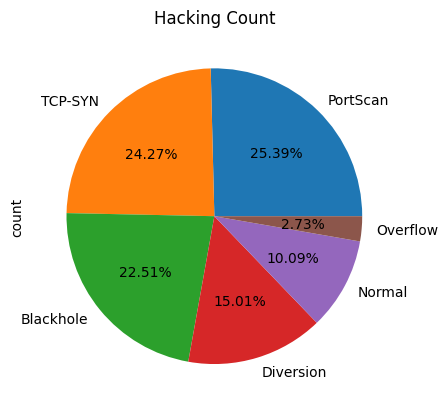

In [51]:

df['Label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Hacking Count")
plt.show()

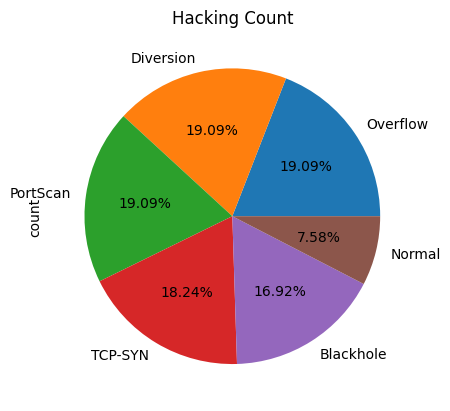

In [52]:
concatenated_df['Label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Hacking Count")
plt.show()

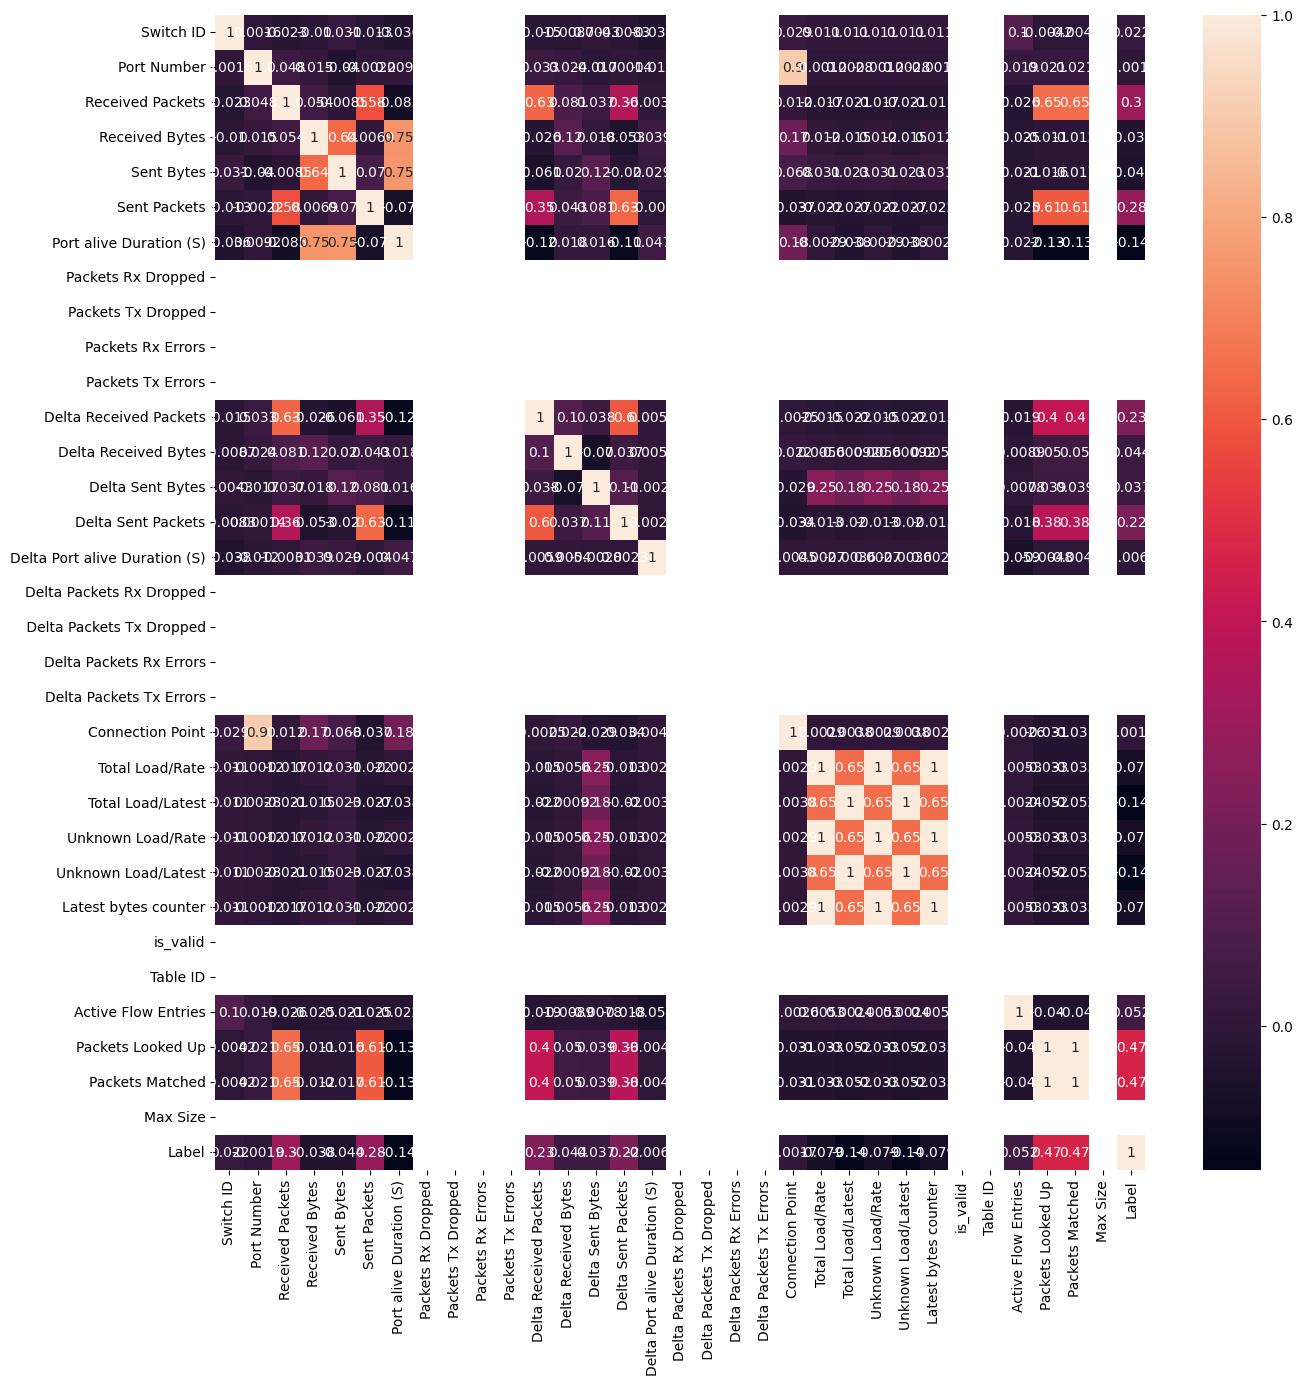

In [53]:
plt.figure(figsize=(15,15))
sns.heatmap(df_a.corr(), annot=True)
plt.show()

In [54]:
#pairplot for particular features

# plt_df = df_a[['Switch ID', 'Port Number', 'Received Packets', 'Received Bytes',
#        'Sent Bytes', 'Sent Packets', 'Port alive Duration (S)',
#        'Packets Rx Dropped', 'Packets Tx Dropped', 'Packets Rx Errors',
#        'Packets Tx Errors', 'Delta Received Packets', 'Delta Received Bytes',
#        'Delta Sent Bytes', 'Delta Sent Packets',
#        'Delta Port alive Duration (S)', 'Delta Packets Rx Dropped',
#        ' Delta Packets Tx Dropped', 'Delta Packets Rx Errors',
#        'Delta Packets Tx Errors', 'Connection Point', 'Total Load/Rate',
#        'Total Load/Latest', 'Unknown Load/Rate', 'Unknown Load/Latest',
#        'Latest bytes counter', 'is_valid', 'Table ID', 'Active Flow Entries',
#        'Packets Looked Up', 'Packets Matched', 'Max Size', 'Label']]
# fig =sns.pairplot(data = plt_df,hue="Label",corner=True);
# fig.savefig("out.png")

In [55]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [56]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33638 entries, 0 to 37410
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Switch ID                      33638 non-null  int64
 1   Port Number                    33638 non-null  int64
 2   Received Packets               33638 non-null  int64
 3   Received Bytes                 33638 non-null  int64
 4   Sent Bytes                     33638 non-null  int64
 5   Sent Packets                   33638 non-null  int64
 6   Port alive Duration (S)        33638 non-null  int64
 7   Packets Rx Dropped             33638 non-null  int64
 8   Packets Tx Dropped             33638 non-null  int64
 9   Packets Rx Errors              33638 non-null  int64
 10  Packets Tx Errors              33638 non-null  int64
 11  Delta Received Packets         33638 non-null  int64
 12  Delta Received Bytes           33638 non-null  int64
 13  Delta Sent Bytes     

In [57]:
# Splitting the dataset into dependant and independant fetature

X = df_a.drop(['Label','Packets Rx Dropped', 'Packets Tx Dropped', 'Packets Rx Errors',
       'Packets Tx Errors','Delta Packets Rx Dropped',
       ' Delta Packets Tx Dropped', 'Delta Packets Rx Errors',
       'Delta Packets Tx Errors', 'is_valid', 'Table ID','Max Size'],axis =1)
y = df_a["Label"]

In [58]:
X1 = concatenated_df_a.drop(['Label','Packets Rx Dropped', 'Packets Tx Dropped', 'Packets Rx Errors',
       'Packets Tx Errors','Delta Packets Rx Dropped',
       ' Delta Packets Tx Dropped', 'Delta Packets Rx Errors',
       'Delta Packets Tx Errors', 'is_valid', 'Table ID','Max Size'],axis =1)
y1 = concatenated_df_a["Label"]

In [59]:
y.unique()

array([0, 1, 2, 3, 4])

In [60]:
y1.unique()

array([0, 1, 2, 3, 4])

In [61]:
X.shape,y.shape

((33638, 21), (33638,))

In [62]:
X1.shape,y1.shape

((46001, 22), (46001,))

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((26910, 21), (26910,), (6728, 21), (6728,))

In [64]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)
X1_train.shape, y1_train.shape, X1_test.shape, y1_test.shape

((36800, 22), (36800,), (9201, 22), (9201,))

## Model Building & Training:
   Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

   There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of suicide rate is a continuous number, or a floating-point number in programming terms. The supervised machine learning models (regression) considered to train the dataset in this notebook are:

1. Logistic Regression
2. k-Nearest Neighbors
3. Support Vector Clasifier
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting
8. Catboost
9. Xgboost
10. Multilayer Perceptrons

              
  The metrics considered to evaluate the model performance are Accuracy & F1 score.

In [65]:
# Creating holders to store the model performance results
from sklearn import metrics
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    f1_score.append(round(b, 3))
    recall.append(round(c, 3))
    precision.append(round(d, 3))

In [66]:
def model_report(modelname,y_train,y_test,p_train,p_test):
    #computing the accuracy, f1_score, Recall, precision of the model performance
    #computing the classification report of the model
    #storing the results. The below mentioned order of parameter passing is important
    print("Model:{}\n".format(modelname))

    acc_train = metrics.accuracy_score(y_train,p_train)
    acc_test = metrics.accuracy_score(y_test,p_test)
    print("Accuracy on training Data: {:.3f}".format(acc_train))
    print("Accuracy on test Data: {:.3f}\n".format(acc_test))

    f1_score_train = metrics.f1_score(y_train,p_train,average='micro')
    f1_score_test = metrics.f1_score(y_test,p_test,average='micro')
    print("f1_score on training Data: {:.3f}".format(f1_score_train))
    print("f1_score on test Data: {:.3f}\n".format(f1_score_test))


    recall_score_train = metrics.recall_score(y_train,p_train,average='micro')
    recall_score_test = metrics.recall_score(y_test,p_test,average='micro')
    print("Recall on training Data: {:.3f}".format(recall_score_train))
    print("Recall on test Data: {:.3f}\n".format(recall_score_test))

    precision_score_train = metrics.precision_score(y_train,p_train,average='micro')
    precision_score_test = metrics.precision_score(y_test,p_test,average='micro')
    print("Precision on training Data: {:.3f}".format(precision_score_train))
    print("Precision on test Data: {:.3f}\n".format(precision_score_test))
    #computing the classification report of the model
    print("Classification Report")
    print(metrics.classification_report(y_test, p_test))

    #storing the results
    storeResults(modelname,acc_test,f1_score_test,
             recall_score_test,precision_score_test)

In [67]:
def model_report1(modelname,y1_train,y1_test,p1_train,p1_test):
    #computing the accuracy, f1_score, Recall, precision of the model performance
    #computing the classification report of the model
    #storing the results. The below mentioned order of parameter passing is important
    print("Model:{}\n".format(modelname))

    acc_train = metrics.accuracy_score(y1_train,p1_train)
    acc_test = metrics.accuracy_score(y1_test,p1_test)
    print("Accuracy on training Data: {:.3f}".format(acc_train))
    print("Accuracy on test Data: {:.3f}\n".format(acc_test))

    f1_score_train = metrics.f1_score(y1_train,p1_train,average='micro')
    f1_score_test = metrics.f1_score(y1_test,p1_test,average='micro')
    print("f1_score on training Data: {:.3f}".format(f1_score_train))
    print("f1_score on test Data: {:.3f}\n".format(f1_score_test))


    recall_score_train = metrics.recall_score(y1_train,p1_train,average='micro')
    recall_score_test = metrics.recall_score(y1_test,p1_test,average='micro')
    print("Recall on training Data: {:.3f}".format(recall_score_train))
    print("Recall on test Data: {:.3f}\n".format(recall_score_test))

    precision_score_train = metrics.precision_score(y1_train,p1_train,average='micro')
    precision_score_test = metrics.precision_score(y1_test,p1_test,average='micro')
    print("Precision on training Data: {:.3f}".format(precision_score_train))
    print("Precision on test Data: {:.3f}\n".format(precision_score_test))
    #computing the classification report of the model
    print("Classification Report")
    print(metrics.classification_report(y1_test, p1_test))

    #storing the results
    storeResults(modelname,acc_test,f1_score_test,
             recall_score_test,precision_score_test)

## Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [68]:
# Linear regression model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model
log.fit(X_train,y_train)

LogisticRegression()

In [70]:
# Linear regression model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model
log.fit(X_train,y_train)

LogisticRegression()

In [69]:
#predicting the target value from the model for the samples

p_train_log = log.predict(X_train)
p_test_log = log.predict(X_test)

In [71]:
# Assuming X1_train and X1_test are your training and test sets

# Drop 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in X1_train.columns:
    X1_train = X1_train.drop(columns=['Unnamed: 0'])

if 'Unnamed: 0' in X1_test.columns:
    X1_test = X1_test.drop(columns=['Unnamed: 0'])

# Now you can make predictions
p1_train_log = log.predict(X1_train)
p1_test_log = log.predict(X1_test)


In [72]:

model_report(str(log),y_train,y_test,p_train_log,p_test_log)

Model:LogisticRegression()

Accuracy on training Data: 0.416
Accuracy on test Data: 0.422

f1_score on training Data: 0.416
f1_score on test Data: 0.422

Recall on training Data: 0.416
Recall on test Data: 0.422

Precision on training Data: 0.416
Precision on test Data: 0.422

Classification Report
              precision    recall  f1-score   support

           0       0.52      0.20      0.29      1824
           1       0.33      0.23      0.27      1665
           2       0.30      0.74      0.43      1138
           3       0.00      0.00      0.00       177
           4       0.62      0.64      0.63      1924

    accuracy                           0.42      6728
   macro avg       0.35      0.36      0.32      6728
weighted avg       0.45      0.42      0.40      6728



In [73]:
model_report1(str(log),y1_train,y1_test,p1_train_log,p1_test_log)

Model:LogisticRegression()

Accuracy on training Data: 0.305
Accuracy on test Data: 0.307

f1_score on training Data: 0.305
f1_score on test Data: 0.307

Recall on training Data: 0.305
Recall on test Data: 0.307

Precision on training Data: 0.305
Precision on test Data: 0.307

Classification Report
              precision    recall  f1-score   support

           0       0.50      0.20      0.28      1849
           1       0.31      0.23      0.26      1619
           2       0.30      0.43      0.35      1925
           3       0.00      0.00      0.00      1859
           4       0.28      0.64      0.39      1949

    accuracy                           0.31      9201
   macro avg       0.28      0.30      0.26      9201
weighted avg       0.28      0.31      0.26      9201



## K-Nearest Neighbors : Classifier

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [74]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [75]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X1_train,y1_train)

KNeighborsClassifier()

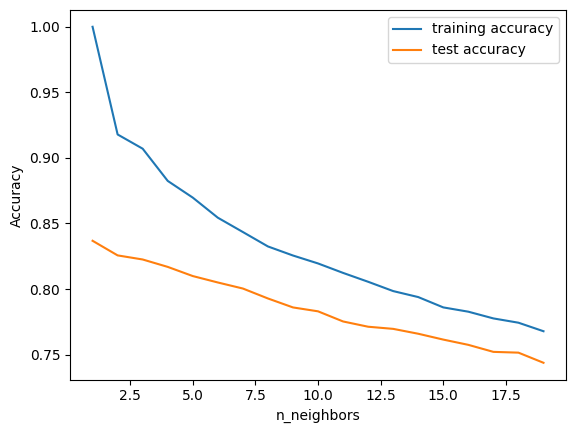

In [76]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn1 = KNeighborsClassifier(n_neighbors=n)

    knn1.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn1.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn1.score(X_test, y_test))


#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

In [77]:
#predicting the target value from the model for the samples
p_train_knn = knn.predict(X_train)
p_test_knn = knn.predict(X_test)

In [78]:
#predicting the target value from the model for the samples
p1_train_knn = knn.predict(X1_train)
p1_test_knn = knn.predict(X1_test)

In [79]:
model_report(str(knn),y_train,y_test,p_train_knn,p_test_knn)

Model:KNeighborsClassifier()

Accuracy on training Data: 0.860
Accuracy on test Data: 0.857

f1_score on training Data: 0.860
f1_score on test Data: 0.857

Recall on training Data: 0.860
Recall on test Data: 0.857

Precision on training Data: 0.860
Precision on test Data: 0.857

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1824
           1       0.88      0.87      0.88      1665
           2       0.87      0.87      0.87      1138
           3       0.81      0.53      0.64       177
           4       0.85      0.85      0.85      1924

    accuracy                           0.86      6728
   macro avg       0.85      0.80      0.82      6728
weighted avg       0.86      0.86      0.86      6728



In [80]:
model_report(str(knn),y1_train,y1_test,p1_train_knn,p1_test_knn)

Model:KNeighborsClassifier()

Accuracy on training Data: 0.905
Accuracy on test Data: 0.857

f1_score on training Data: 0.905
f1_score on test Data: 0.857

Recall on training Data: 0.905
Recall on test Data: 0.857

Precision on training Data: 0.905
Precision on test Data: 0.857

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1849
           1       0.83      0.83      0.83      1619
           2       0.90      0.90      0.90      1925
           3       0.98      0.93      0.96      1859
           4       0.80      0.80      0.80      1949

    accuracy                           0.86      9201
   macro avg       0.86      0.86      0.86      9201
weighted avg       0.86      0.86      0.86      9201



## Naive Bayes : Classifier

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text, image classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [81]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model
nb.fit(X_train,y_train)

GaussianNB()

In [82]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model
nb.fit(X1_train,y1_train)

GaussianNB()

In [83]:
#predicting the target value from the model for the samples
p_train_nb = nb.predict(X_train)
p_test_nb = nb.predict(X_test)

In [84]:
#predicting the target value from the model for the samples
p1_train_nb = nb.predict(X1_train)
p1_test_nb = nb.predict(X1_test)

In [85]:
model_report(str(nb),y_train,y_test,p_train_nb,p_test_nb)

Model:GaussianNB()

Accuracy on training Data: 0.416
Accuracy on test Data: 0.418

f1_score on training Data: 0.416
f1_score on test Data: 0.418

Recall on training Data: 0.416
Recall on test Data: 0.418

Precision on training Data: 0.416
Precision on test Data: 0.418

Classification Report
              precision    recall  f1-score   support

           0       0.57      0.40      0.47      1824
           1       0.45      0.12      0.19      1665
           2       0.38      0.71      0.50      1138
           3       0.05      0.56      0.10       177
           4       1.00      0.51      0.67      1924

    accuracy                           0.42      6728
   macro avg       0.49      0.46      0.39      6728
weighted avg       0.62      0.42      0.45      6728



In [86]:
model_report(str(nb),y1_train,y1_test,p1_train_nb,p1_test_nb)

Model:GaussianNB()

Accuracy on training Data: 0.488
Accuracy on test Data: 0.491

f1_score on training Data: 0.488
f1_score on test Data: 0.491

Recall on training Data: 0.488
Recall on test Data: 0.491

Precision on training Data: 0.488
Precision on test Data: 0.491

Classification Report
              precision    recall  f1-score   support

           0       0.57      0.38      0.46      1849
           1       0.46      0.14      0.22      1619
           2       0.39      0.42      0.41      1925
           3       0.40      0.95      0.56      1859
           4       1.00      0.52      0.68      1949

    accuracy                           0.49      9201
   macro avg       0.56      0.48      0.47      9201
weighted avg       0.57      0.49      0.47      9201



##  Decision Trees : Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [87]:
# Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth=30)

# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [88]:
# Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth=30)

# fit the model
tree.fit(X1_train, y1_train)

DecisionTreeClassifier(max_depth=30)

In [89]:
#predicting the target value from the model for the samples

p_train_tree = tree.predict(X_train)
p_test_tree = tree.predict(X_test)

In [90]:
#predicting the target value from the model for the samples

p1_train_tree = tree.predict(X1_train)
p1_test_tree = tree.predict(X1_test)

In [91]:
model_report(str(tree),y_train,y_test,p_train_nb,p_test_tree)

Model:DecisionTreeClassifier(max_depth=30)

Accuracy on training Data: 0.416
Accuracy on test Data: 0.974

f1_score on training Data: 0.416
f1_score on test Data: 0.974

Recall on training Data: 0.416
Recall on test Data: 0.974

Precision on training Data: 0.416
Precision on test Data: 0.974

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1824
           1       0.99      0.99      0.99      1665
           2       0.99      0.99      0.99      1138
           3       0.93      0.95      0.94       177
           4       0.96      0.97      0.97      1924

    accuracy                           0.97      6728
   macro avg       0.97      0.97      0.97      6728
weighted avg       0.97      0.97      0.97      6728



In [92]:
model_report(str(tree),y1_train,y1_test,p1_train_nb,p1_test_tree)

Model:DecisionTreeClassifier(max_depth=30)

Accuracy on training Data: 0.488
Accuracy on test Data: 0.935

f1_score on training Data: 0.488
f1_score on test Data: 0.935

Recall on training Data: 0.488
Recall on test Data: 0.935

Precision on training Data: 0.488
Precision on test Data: 0.935

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1849
           1       0.98      0.98      0.98      1619
           2       0.96      0.96      0.96      1925
           3       0.96      0.95      0.95      1859
           4       0.90      0.90      0.90      1949

    accuracy                           0.93      9201
   macro avg       0.94      0.94      0.94      9201
weighted avg       0.93      0.93      0.93      9201



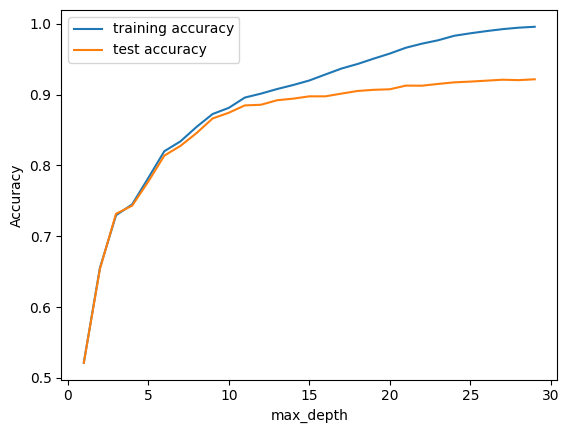

In [93]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))


#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend();

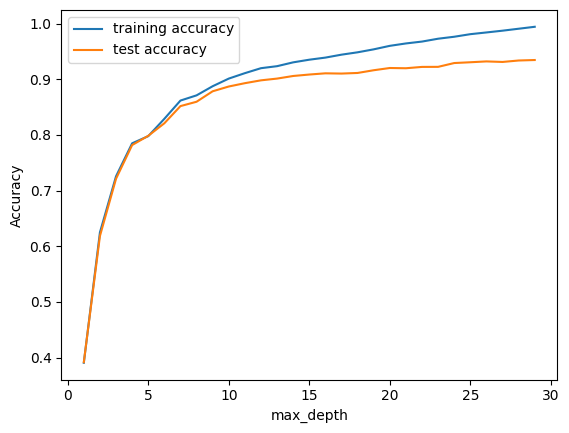

In [94]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X1_train, y1_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X1_train, y1_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X1_test, y1_test))


#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend();

##  Random Forest : Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [95]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [96]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model
forest.fit(X1_train,y1_train)

RandomForestClassifier(n_estimators=10)

In [97]:
#predicting the target value from the model for the samples
p_train_forest = forest.predict(X_train)
p_test_forest = forest.predict(X_test)

In [98]:
#predicting the target value from the model for the samples
p1_train_forest = forest.predict(X1_train)
p1_test_forest = forest.predict(X1_test)

In [99]:
model_report(str(forest),y_train,y_test,p_train_nb,p_test_forest)

Model:RandomForestClassifier(n_estimators=10)

Accuracy on training Data: 0.416
Accuracy on test Data: 0.980

f1_score on training Data: 0.416
f1_score on test Data: 0.980

Recall on training Data: 0.416
Recall on test Data: 0.980

Precision on training Data: 0.416
Precision on test Data: 0.980

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1824
           1       0.99      0.99      0.99      1665
           2       1.00      0.99      1.00      1138
           3       0.99      0.93      0.96       177
           4       0.97      0.98      0.97      1924

    accuracy                           0.98      6728
   macro avg       0.98      0.97      0.98      6728
weighted avg       0.98      0.98      0.98      6728



In [100]:
model_report(str(forest),y1_train,y1_test,p1_train_nb,p1_test_forest)

Model:RandomForestClassifier(n_estimators=10)

Accuracy on training Data: 0.488
Accuracy on test Data: 0.947

f1_score on training Data: 0.488
f1_score on test Data: 0.947

Recall on training Data: 0.488
Recall on test Data: 0.947

Precision on training Data: 0.488
Precision on test Data: 0.947

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1849
           1       0.98      0.97      0.98      1619
           2       0.99      0.97      0.98      1925
           3       0.99      0.96      0.97      1859
           4       0.91      0.90      0.91      1949

    accuracy                           0.95      9201
   macro avg       0.95      0.95      0.95      9201
weighted avg       0.95      0.95      0.95      9201



## Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective.

In [101]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [102]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model
gbc.fit(X1_train,y1_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [103]:
#predicting the target value from the model for the samples
p_train_gbc = gbc.predict(X_train)
p_test_gbc = gbc.predict(X_test)

In [104]:
#predicting the target value from the model for the samples
p1_train_gbc = gbc.predict(X1_train)
p1_test_gbc = gbc.predict(X1_test)

In [105]:
model_report(str(gbc),y_train,y_test,p_train_nb,p_test_gbc)

Model:GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

Accuracy on training Data: 0.416
Accuracy on test Data: 0.986

f1_score on training Data: 0.416
f1_score on test Data: 0.986

Recall on training Data: 0.416
Recall on test Data: 0.986

Precision on training Data: 0.416
Precision on test Data: 0.986

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1824
           1       1.00      1.00      1.00      1665
           2       1.00      1.00      1.00      1138
           3       1.00      0.97      0.98       177
           4       0.97      0.99      0.98      1924

    accuracy                           0.99      6728
   macro avg       0.99      0.98      0.99      6728
weighted avg       0.99      0.99      0.99      6728



In [106]:
model_report(str(gbc),y1_train,y1_test,p1_train_nb,p1_test_gbc)

Model:GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

Accuracy on training Data: 0.488
Accuracy on test Data: 0.970

f1_score on training Data: 0.488
f1_score on test Data: 0.970

Recall on training Data: 0.488
Recall on test Data: 0.970

Precision on training Data: 0.488
Precision on test Data: 0.970

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1849
           1       1.00      0.99      0.99      1619
           2       0.99      0.99      0.99      1925
           3       0.99      0.99      0.99      1859
           4       0.94      0.95      0.94      1949

    accuracy                           0.97      9201
   macro avg       0.97      0.97      0.97      9201
weighted avg       0.97      0.97      0.97      9201



## CatBoost Classifier

CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today.

In [107]:
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model
cat.fit(X_train,y_train)

ModuleNotFoundError: No module named 'catboost'

In [ ]:
#predicting the target value from the model for the samples
p_train_cat = cat.predict(X_train)
p_test_cat = cat.predict(X_test)

In [ ]:
model_report(str(cat),y_train,y_test,p_train_cat,p_test_cat)

##  XGBoost Classifier

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning. In this post you will discover how you can install and create your first XGBoost model in Python

In [108]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier()

# fit the model
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [109]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier()

# fit the model
xgb.fit(X1_train,y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [110]:
#predicting the target value from the model for the samples
p_train_xgb = xgb.predict(X_train)
p_test_xgb = xgb.predict(X_test)

In [111]:
#predicting the target value from the model for the samples
p1_train_xgb = xgb.predict(X1_train)
p1_test_xgb = xgb.predict(X1_test)

In [112]:
model_report(str(xgb),y_train,y_test,p_train_xgb,p_test_xgb)

Model:XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy on training Data: 0.985
Accuracy on test Data: 0.983

f1_score on training Data: 0.985
f1_score on test Data: 0.983

Recall on training Data: 0.985
Recall on test Data: 0.983

Precision on training Data: 0.985
Precisi

In [113]:
model_report(str(xgb),y1_train,y1_test,p1_train_xgb,p1_test_xgb)

Model:XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy on training Data: 0.993
Accuracy on test Data: 0.968

f1_score on training Data: 0.993
f1_score on test Data: 0.968

Recall on training Data: 0.993
Recall on test Data: 0.968

Precision on training Data: 0.993
Precisi

##  Multi-layer Perceptron classifier

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.


In [114]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model
mlp.fit(X_train,y_train)

MLPClassifier()

In [115]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model
mlp.fit(X1_train,y1_train)

MLPClassifier()

In [116]:
#predicting the target value from the model for the samples
p_train_mlp = mlp.predict(X_train)
p_test_mlp = mlp.predict(X_test)

In [117]:
#predicting the target value from the model for the samples
p1_train_mlp = mlp.predict(X1_train)
p1_test_mlp = mlp.predict(X1_test)

In [118]:
model_report(str(mlp),y_train,y_test,p_train_mlp,p_test_mlp)

Model:MLPClassifier()

Accuracy on training Data: 0.564
Accuracy on test Data: 0.572

f1_score on training Data: 0.564
f1_score on test Data: 0.572

Recall on training Data: 0.564
Recall on test Data: 0.572

Precision on training Data: 0.564
Precision on test Data: 0.572

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.47      0.57      1824
           1       0.44      0.83      0.57      1665
           2       0.62      0.33      0.43      1138
           3       0.23      0.31      0.26       177
           4       0.77      0.62      0.68      1924

    accuracy                           0.57      6728
   macro avg       0.55      0.51      0.50      6728
weighted avg       0.63      0.57      0.57      6728



In [119]:
model_report(str(mlp),y1_train,y1_test,p1_train_mlp,p1_test_mlp)

Model:MLPClassifier()

Accuracy on training Data: 0.681
Accuracy on test Data: 0.672

f1_score on training Data: 0.681
f1_score on test Data: 0.672

Recall on training Data: 0.681
Recall on test Data: 0.672

Precision on training Data: 0.681
Precision on test Data: 0.672

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.47      0.56      1849
           1       0.42      0.81      0.56      1619
           2       0.81      0.58      0.68      1925
           3       0.89      0.92      0.90      1859
           4       0.76      0.61      0.68      1949

    accuracy                           0.67      9201
   macro avg       0.72      0.68      0.67      9201
weighted avg       0.72      0.67      0.68      9201



##  Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [121]:
import pandas as pd

# Data for models trained on the normal dataset
data_normal = {
    'Model': [
        'LogisticRegression', 'KNeighborsClassifier', 'GaussianNB',
        'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier',
        'XGBClassifier', 'MLPClassifier'
    ],
    'Accuracy': [0.422, 0.857, 0.418, 0.974, 0.980, 0.986, 0.983, 0.572],
    'F1 Score': [0.422, 0.857, 0.418, 0.974, 0.980, 0.986, 0.983, 0.572],
    'Recall': [0.422, 0.857, 0.418, 0.974, 0.980, 0.986, 0.983, 0.572],
    'Precision': [0.422, 0.857, 0.418, 0.974, 0.980, 0.986, 0.983, 0.572],
    'Dataset': 'Normal'
}

# Data for models trained on the enhanced dataset
data_enhanced = {
    'Model': [
        'LogisticRegression', 'KNeighborsClassifier', 'GaussianNB',
        'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier',
        'XGBClassifier', 'MLPClassifier'
    ],
    'Accuracy': [0.307, 0.857, 0.491, 0.935, 0.947, 0.970, 0.968, 0.672],
    'F1 Score': [0.307, 0.857, 0.491, 0.935, 0.947, 0.970, 0.968, 0.672],
    'Recall': [0.307, 0.857, 0.491, 0.935, 0.947, 0.970, 0.968, 0.672],
    'Precision': [0.307, 0.857, 0.491, 0.935, 0.947, 0.970, 0.968, 0.672],
    'Dataset': 'Enhanced'
}

# Convert to DataFrames
df_normal = pd.DataFrame(data_normal)
df_enhanced = pd.DataFrame(data_enhanced)

# Combine the DataFrames for comparison
combined_results = pd.concat([df_normal, df_enhanced], ignore_index=True)

# Display the combined results
print(combined_results)


                         Model  Accuracy  F1 Score  Recall  Precision  \
0           LogisticRegression     0.422     0.422   0.422      0.422   
1         KNeighborsClassifier     0.857     0.857   0.857      0.857   
2                   GaussianNB     0.418     0.418   0.418      0.418   
3       DecisionTreeClassifier     0.974     0.974   0.974      0.974   
4       RandomForestClassifier     0.980     0.980   0.980      0.980   
5   GradientBoostingClassifier     0.986     0.986   0.986      0.986   
6                XGBClassifier     0.983     0.983   0.983      0.983   
7                MLPClassifier     0.572     0.572   0.572      0.572   
8           LogisticRegression     0.307     0.307   0.307      0.307   
9         KNeighborsClassifier     0.857     0.857   0.857      0.857   
10                  GaussianNB     0.491     0.491   0.491      0.491   
11      DecisionTreeClassifier     0.935     0.935   0.935      0.935   
12      RandomForestClassifier     0.947     0.947 

In [122]:
# Display side-by-side comparison
comparison = combined_results.pivot(index='Model', columns='Dataset', values=['Accuracy', 'F1 Score', 'Recall', 'Precision'])
print(comparison)


                           Accuracy        F1 Score          Recall         \
Dataset                    Enhanced Normal Enhanced Normal Enhanced Normal   
Model                                                                        
DecisionTreeClassifier        0.935  0.974    0.935  0.974    0.935  0.974   
GaussianNB                    0.491  0.418    0.491  0.418    0.491  0.418   
GradientBoostingClassifier    0.970  0.986    0.970  0.986    0.970  0.986   
KNeighborsClassifier          0.857  0.857    0.857  0.857    0.857  0.857   
LogisticRegression            0.307  0.422    0.307  0.422    0.307  0.422   
MLPClassifier                 0.672  0.572    0.672  0.572    0.672  0.572   
RandomForestClassifier        0.947  0.980    0.947  0.980    0.947  0.980   
XGBClassifier                 0.968  0.983    0.968  0.983    0.968  0.983   

                           Precision         
Dataset                     Enhanced Normal  
Model                                        
Dec

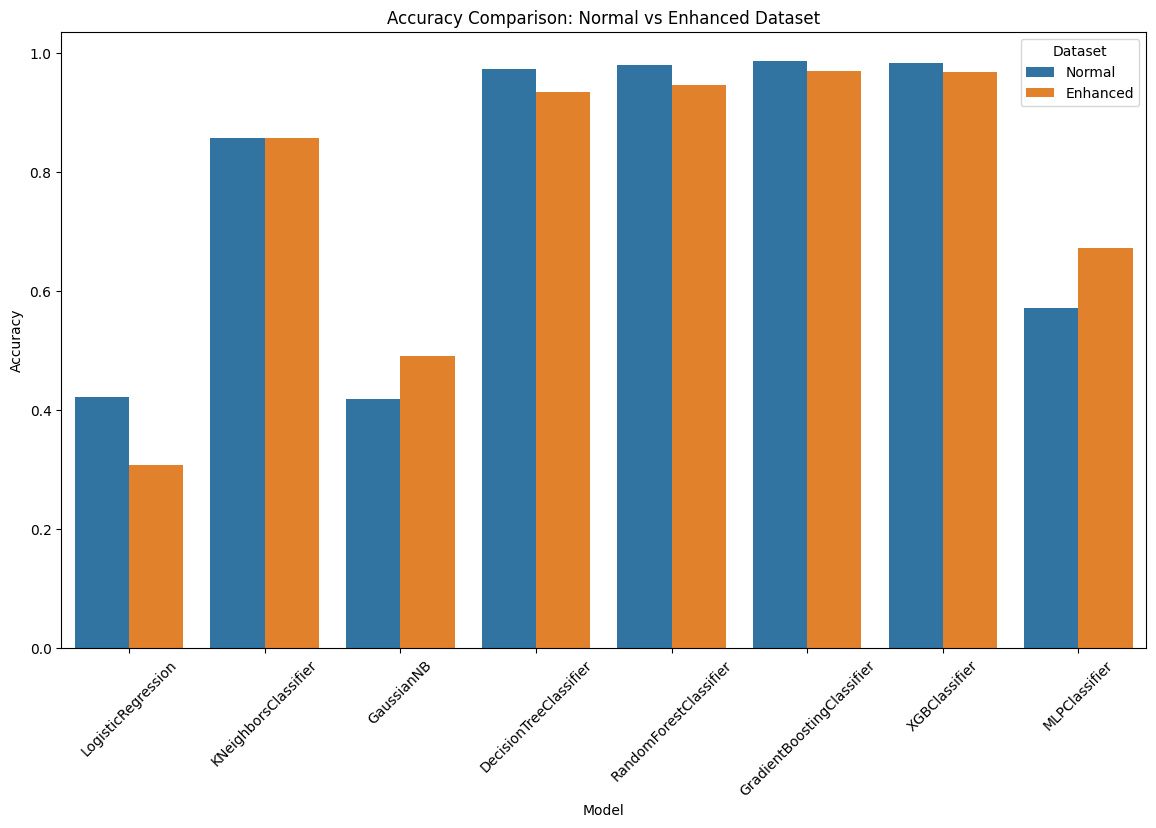

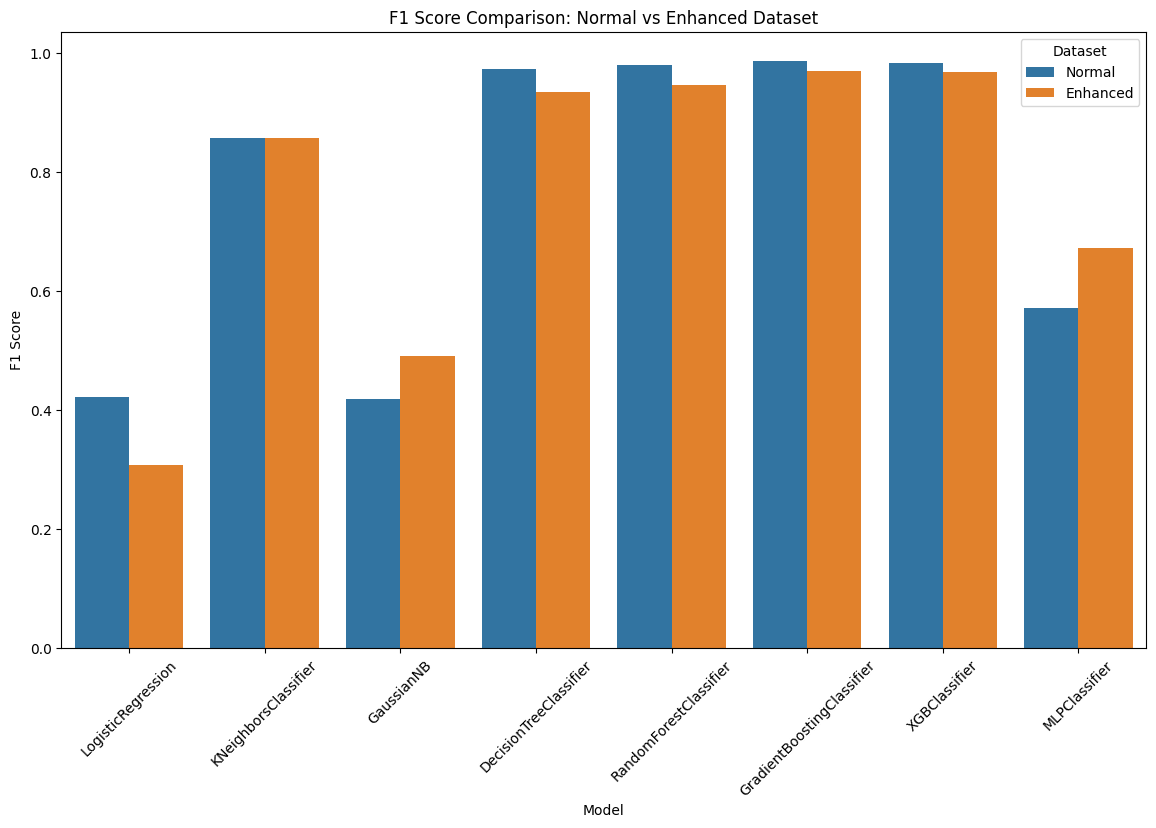

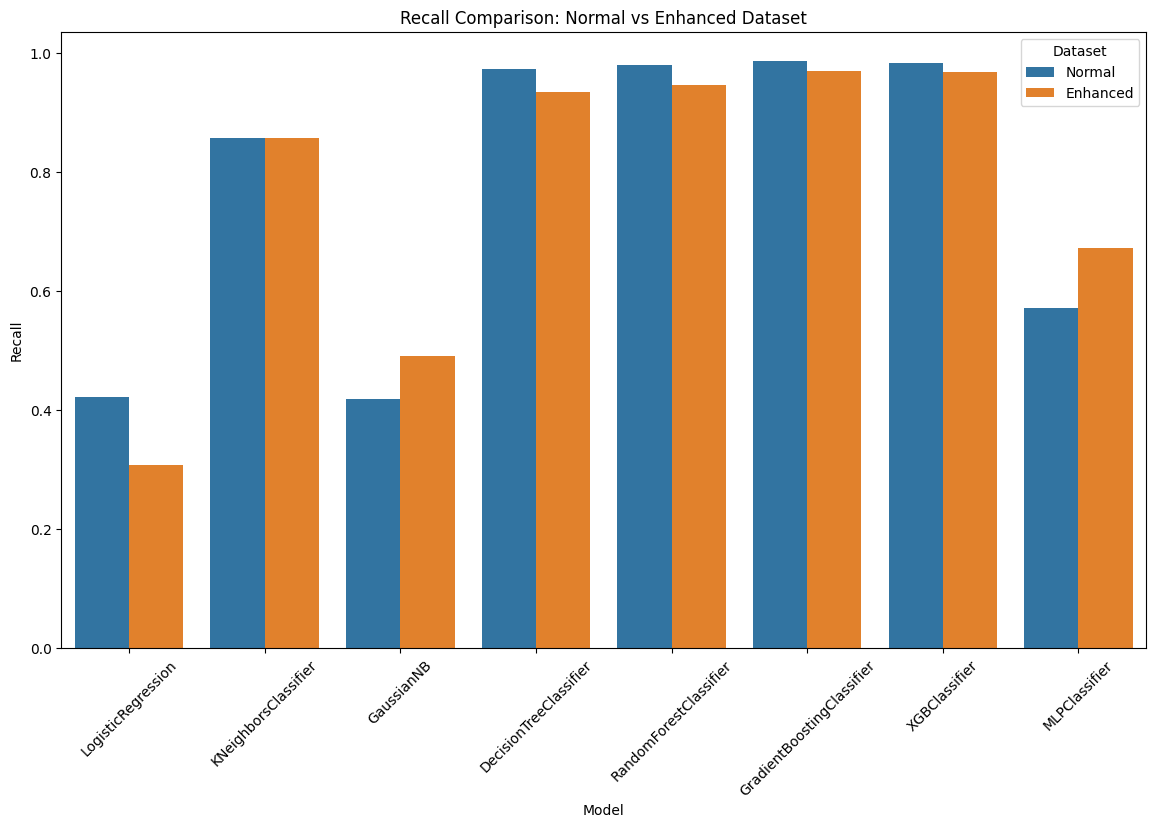

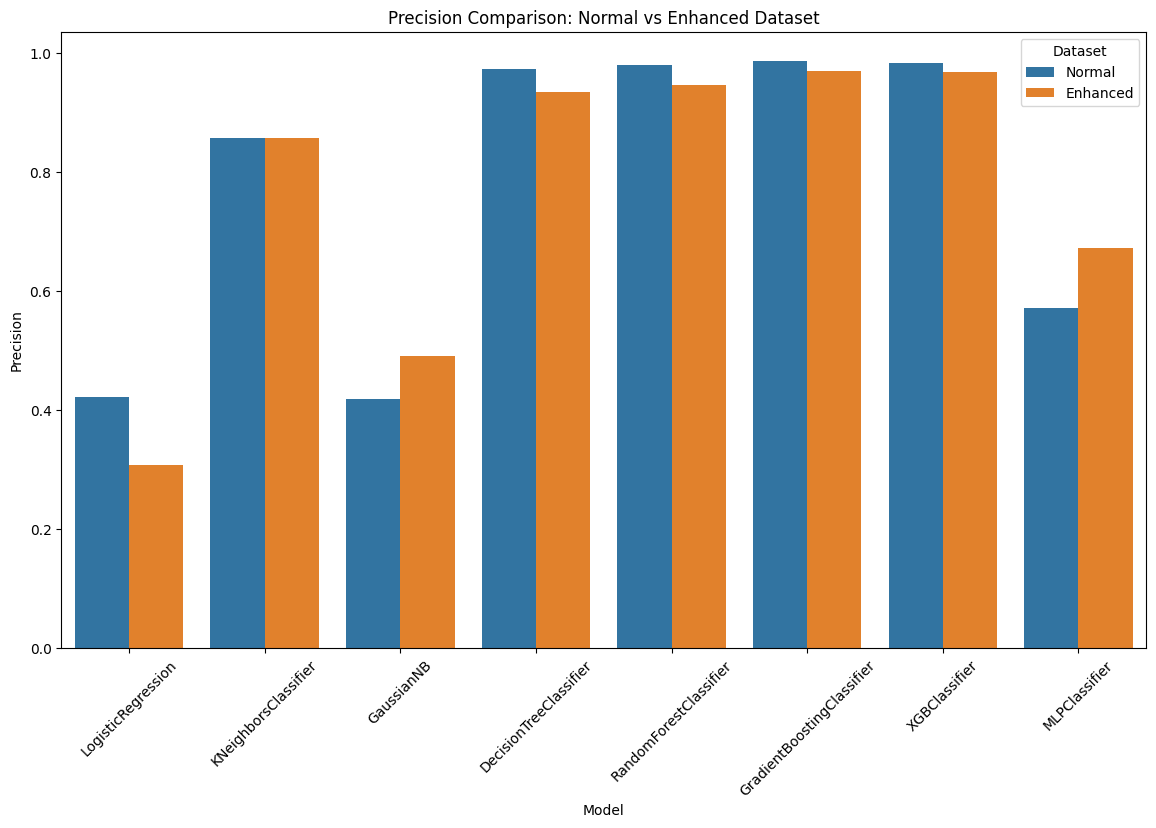

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Accuracy Comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Accuracy', hue='Dataset', data=combined_results)
plt.title('Accuracy Comparison: Normal vs Enhanced Dataset')
plt.xticks(rotation=45)
plt.show()

# Similarly, plot F1 Score, Recall, and Precision
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='F1 Score', hue='Dataset', data=combined_results)
plt.title('F1 Score Comparison: Normal vs Enhanced Dataset')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Recall', hue='Dataset', data=combined_results)
plt.title('Recall Comparison: Normal vs Enhanced Dataset')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Precision', hue='Dataset', data=combined_results)
plt.title('Precision Comparison: Normal vs Enhanced Dataset')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [ ]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)
sorted_result

## Storing High Score Model

In [ ]:
##  high_score_model ---> XGBoost Classifier Model
import pickle

high_score_model = XGBClassifier()

high_score_model.fit(X_train,y_train)

# dump information to that file
#pickle.dump(high_score_model, open('pickle/model.pkl', 'wb'))

In [ ]:
pickle.dump(high_score_model, open('model.pkl', 'wb'))

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()